# James Griffin
## homework 5 
### 213R 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

## 1 PCA dimentionality reduction 

In [5]:
mnist = datasets.load_digits()

x = mnist.data / 255.0
y = mnist.target

In [12]:
plt.imshow(x[1].reshape(64,64), cmap='Greys')

ValueError: cannot reshape array of size 64 into shape (64,64)

In [162]:
# x = pd.DataFrame(x)
# x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.023529,0.050980,0.039216,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.043137,0.062745,0.039216,0.000000,0.0
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.0,0.0,0.0,0.000000,...,0.019608,0.0,0.0,0.0,0.000000,0.011765,0.043137,0.062745,0.035294,0.0
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.0,0.0,0.0,0.031373,...,0.035294,0.0,0.0,0.0,0.027451,0.050980,0.050980,0.035294,0.000000,0.0
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.007843,0.062745,0.015686,0.000000,0.0


In [163]:

from sklearn.datasets import fetch_mldata

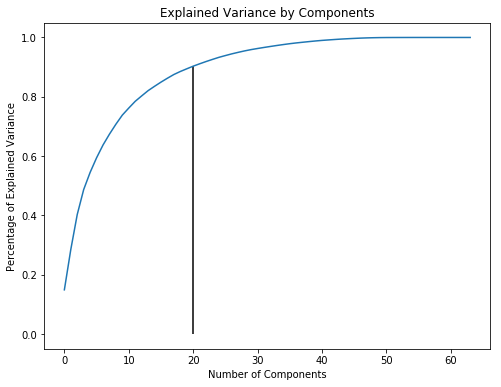

In [164]:
#graphing variance and componants 
pca = PCA()
x_pca = pca.fit_transform(x) #doing the SVD on data
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(8,6))
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Number of Components')
plt.title('Explained Variance by Components')
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.plot(range(len(cum_ratio)), cum_ratio)

a. How many components did you use? Why?
    I will use 20 components because that gathers almost 90% of the data with just twenty features - I feel like the additioanl gain from the few features is greatly diminitioning after 20, we could probably go all the way to 30, I wanted to use 20 because I feel like the marginal benefit of additional features isn't that big 
    
b. Plot the first two components. Do you notice any trends? What is this plot showing us?

c. Why would you use PCA? What is it doing? And what are the drawbacks?

Text(0.5, 1.0, 'First 2 Principle Components')

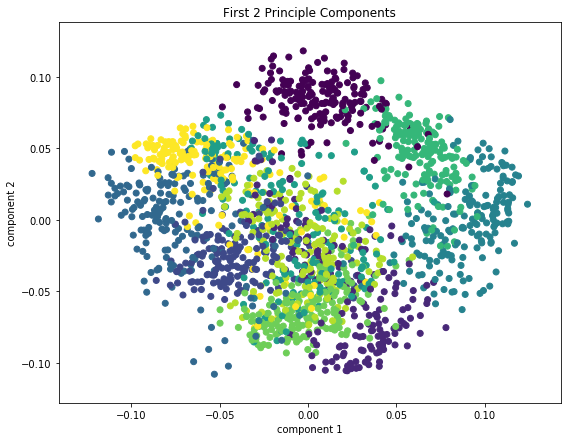

In [165]:
pca = PCA(n_components = 2)
#selecting the first two components of the PCA reduction 
data_pca = pca.fit_transform(x)
#

#creating graph
f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
             c=y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

b. Plot the first two components. Do you notice any trends? What is this plot showing us?
There doesn't appear to be any real trends in the data of the first two components. 
    
c. Why would you use PCA? What is it doing? And what are the drawbacks?

The purpose of PCA is to reduce dimentionality as it caputres the maximum variance for each component, which it does through Singular Value Decomposition.  However as it uses the eigan vectors and values, it becomes hard to interpret, as the features aren't from the data set, but an output of the SVD which simply max the varience for each component, being orthoginal to eachother, this makes it difficult to explain how the model is making predictions. 

In [14]:
#first reduce dimensionality before feeding to t-sne


plt.imshow(x[1].reshape((28,28)), cmap='Greys')


'''
Hey Nelson, for the life of me I could not figure out how to print the numbers. I looked at what you did, 
but that didnt make any sense to me.  This is straight form Tylers notes, but it also did not work.  The idea is 
that when you compress the images farther, it becomes more and more 
difficult to tell what the original image is.  This is because you are giving up 
more and more data points, which at first probably don't make that 
much of a difference, but after a while add up and make it impossible 
to tell what the original image was 


'''

ValueError: cannot reshape array of size 64 into shape (28,28)

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

## 2 TSNE

In [136]:
#first reduce dimensionality before feeding to t-sne


rows = np.arange(1797) # the number of rows in the data 
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.006s...
[t-SNE] Computed neighbors for 1797 samples in 0.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.051518
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.171207
[t-SNE] KL divergence after 1000 iterations: 0.666972


In [137]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

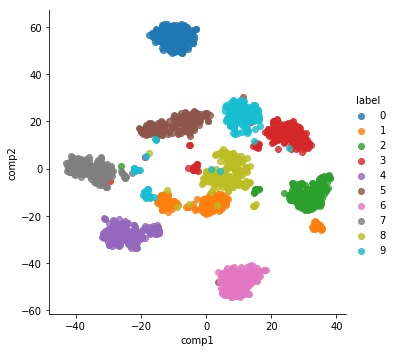

In [138]:

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [139]:
rows = np.arange(1797) # the number of rows in the data 
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.009s...
[t-SNE] Computed neighbors for 1797 samples in 0.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.038133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.488579
[t-SNE] KL divergence after 1000 iterations: 0.835359


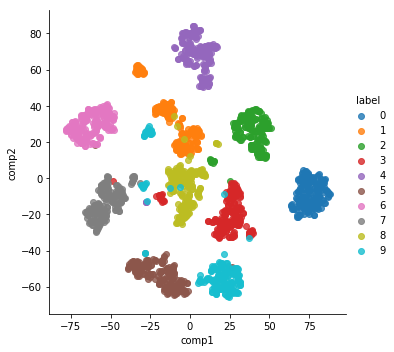

In [140]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]


sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



a. How does this plot differ from your PCA plot?
b. How robust is it to changes in perplexity?

There are more distinct clustrs with a perplexity of 50, with a lower perplexity of 15, the clusters are largely the same, less distinct and more clustered around the centre of the graph. 

It differs from the PCA grapu because there are actually clusters that you can see and visualize.  tells you there are clusters of certain data points, but they are still hard to interpret around what they cluster. 


In [141]:
rows = np.arange(1797) # the number of rows in the data 
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=250, learning_rate=20)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.007s...
[t-SNE] Computed neighbors for 1797 samples in 0.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.038133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.419762
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


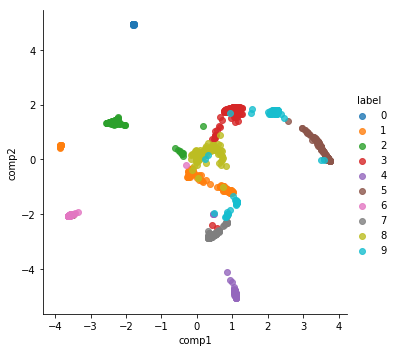

In [142]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]


sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



c. How robust is it to different learning rate and number of iterations?

The plot does not change significantly when I only changed the learning rate from 200 to 20.  The clusters are closer together, and some points slightly over lap, but roughly the same picture, more centred, but overall not too terribly different, but when I only did 250 iterations, the cluster was drastically different. Hard to interpret this image, not really giving much in the form of clustering. 



## K means 

In [143]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x)
group = kmeans.labels_
print(kmeans.labels_)

[4 2 2 ... 2 1 1]


How did you choose K?? 

I chose 10 clusters because from the previous problems I could clearly see 10 clusters, so I chose 10 to stay consistant with what the data was showing me.  

In [144]:
silhouette_score(x, group, metric = "euclidean")

0.18224365397040895

The silhouette coefficient returns how far away are my clusters, are from eachother.  It does this by taking the average euclidian distance from other clusters, and weighing them by how far the dosts are from the closest data point within its own cluster.  You want to maximize this number, because you ensure the integrety of your data while also making sure that your clusters are distinct and have little to no overlap. 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.006s...
[t-SNE] Computed neighbors for 1797 samples in 0.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.051518
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.338585
[t-SNE] KL divergence after 1000 iterations: 0.669008


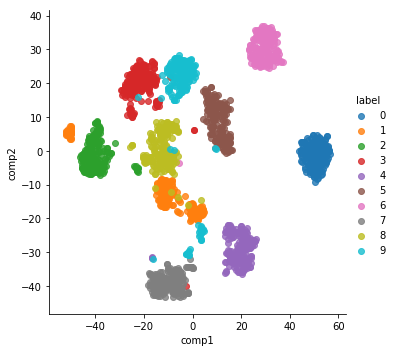

In [146]:
rows = np.arange(1797) # the number of rows in the data 
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]


sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



c) Visualize your clusters using T-SNE.

d) Did you scale your data?

I did not for a couple of reasons. I don't fully understand the differences inherrant in my data.  If i care about small changes causing big differences in my clustering then I want to scale, but if, for example, you are clustering canadian cities based on distances, although there are typically bigger differences East/West than North/South, you could be fine to just use unscaled and perhaps adjust by degrees or something like that.  But because I don't know the underlying meanings of the data points, I left them how there were, and to be honest, I just didnt want to either. 



## 4 Hierarchical Clustering 

In [153]:
x_sample = x[:200]

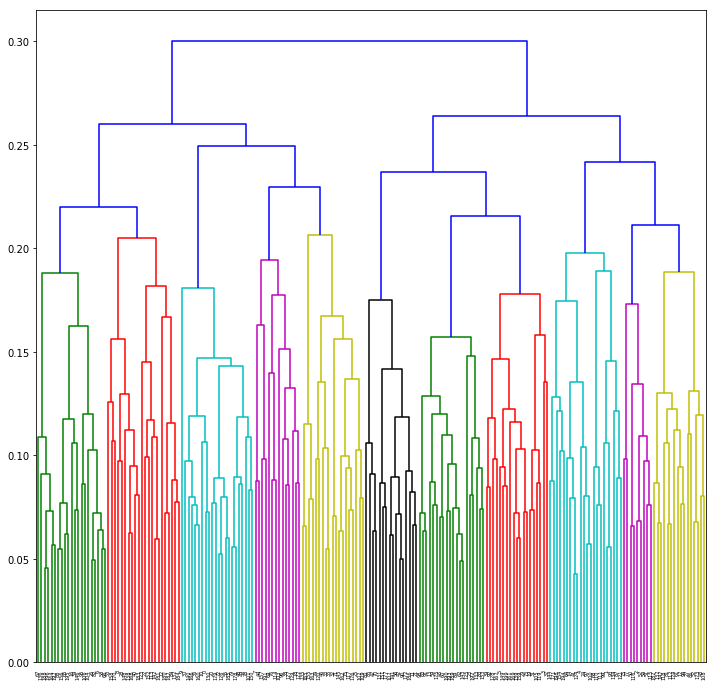

In [154]:
Z = linkage(x_sample, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

b) How many clusters seem reasonable based on your graph?

right at about .22 or .23 on the y axis it looks like there are about 7 - 8 clusters.  

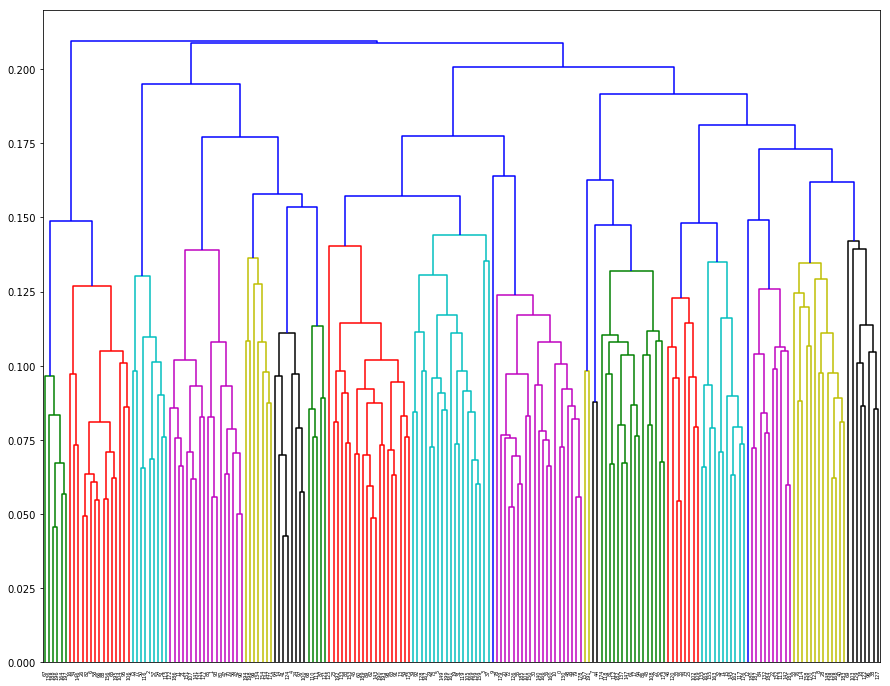

In [157]:
Z = linkage(x_cluster, 'weighted')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)


c. How does your dendrogram change with different linkage methods?

When I take a weighted average of how far the distances are, they are much less willing to cluster initially, the lines are longer at the bottom and then converge rather quickly at the top. 

